In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
actual1 = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data//section 4/actual.xlsx')
qrnn = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/qrnn2/qrnn2pred.xlsx')
mcqrnn = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/mcqrnn/mcqrnn2pred.xlsx')
qrf = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/qrf/predqrf.xlsx')
qrlasso = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/qrlasso/lassopred.xlsx')
vrlg = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/vrlg/vrlg.xlsx')
wrgg = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/wrgg/wrgg.xlsx')
tsmg = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/tsmg/tsmg.xlsx')
ermg = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/ermg/ermg.xlsx')
trqg = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/trqg/trqg.xlsx')
trmg = pd.read_excel('C:/Users/ym_ya/Desktop/windpower/Simulation code and data/trmg/trmg.xlsx')

true_values = actual1.iloc[:, :].values
qrlasso = qrlasso.iloc[:, :].values
qrf = qrf.iloc[:, :].values
qrnn = qrnn.iloc[:, :].values
mcqrnn = mcqrnn.iloc[:, :].values
vrlg = vrlg.iloc[:, :].values
wrgg = wrgg.iloc[:, :].values
ermg = ermg.iloc[:, :].values
tsmg = tsmg.iloc[:, :].values
trqg = trqg.iloc[:, :].values
trmg = trmg.iloc[:, :].values


m = 0
n = len(actual1)
x = [i for i in range(n)]

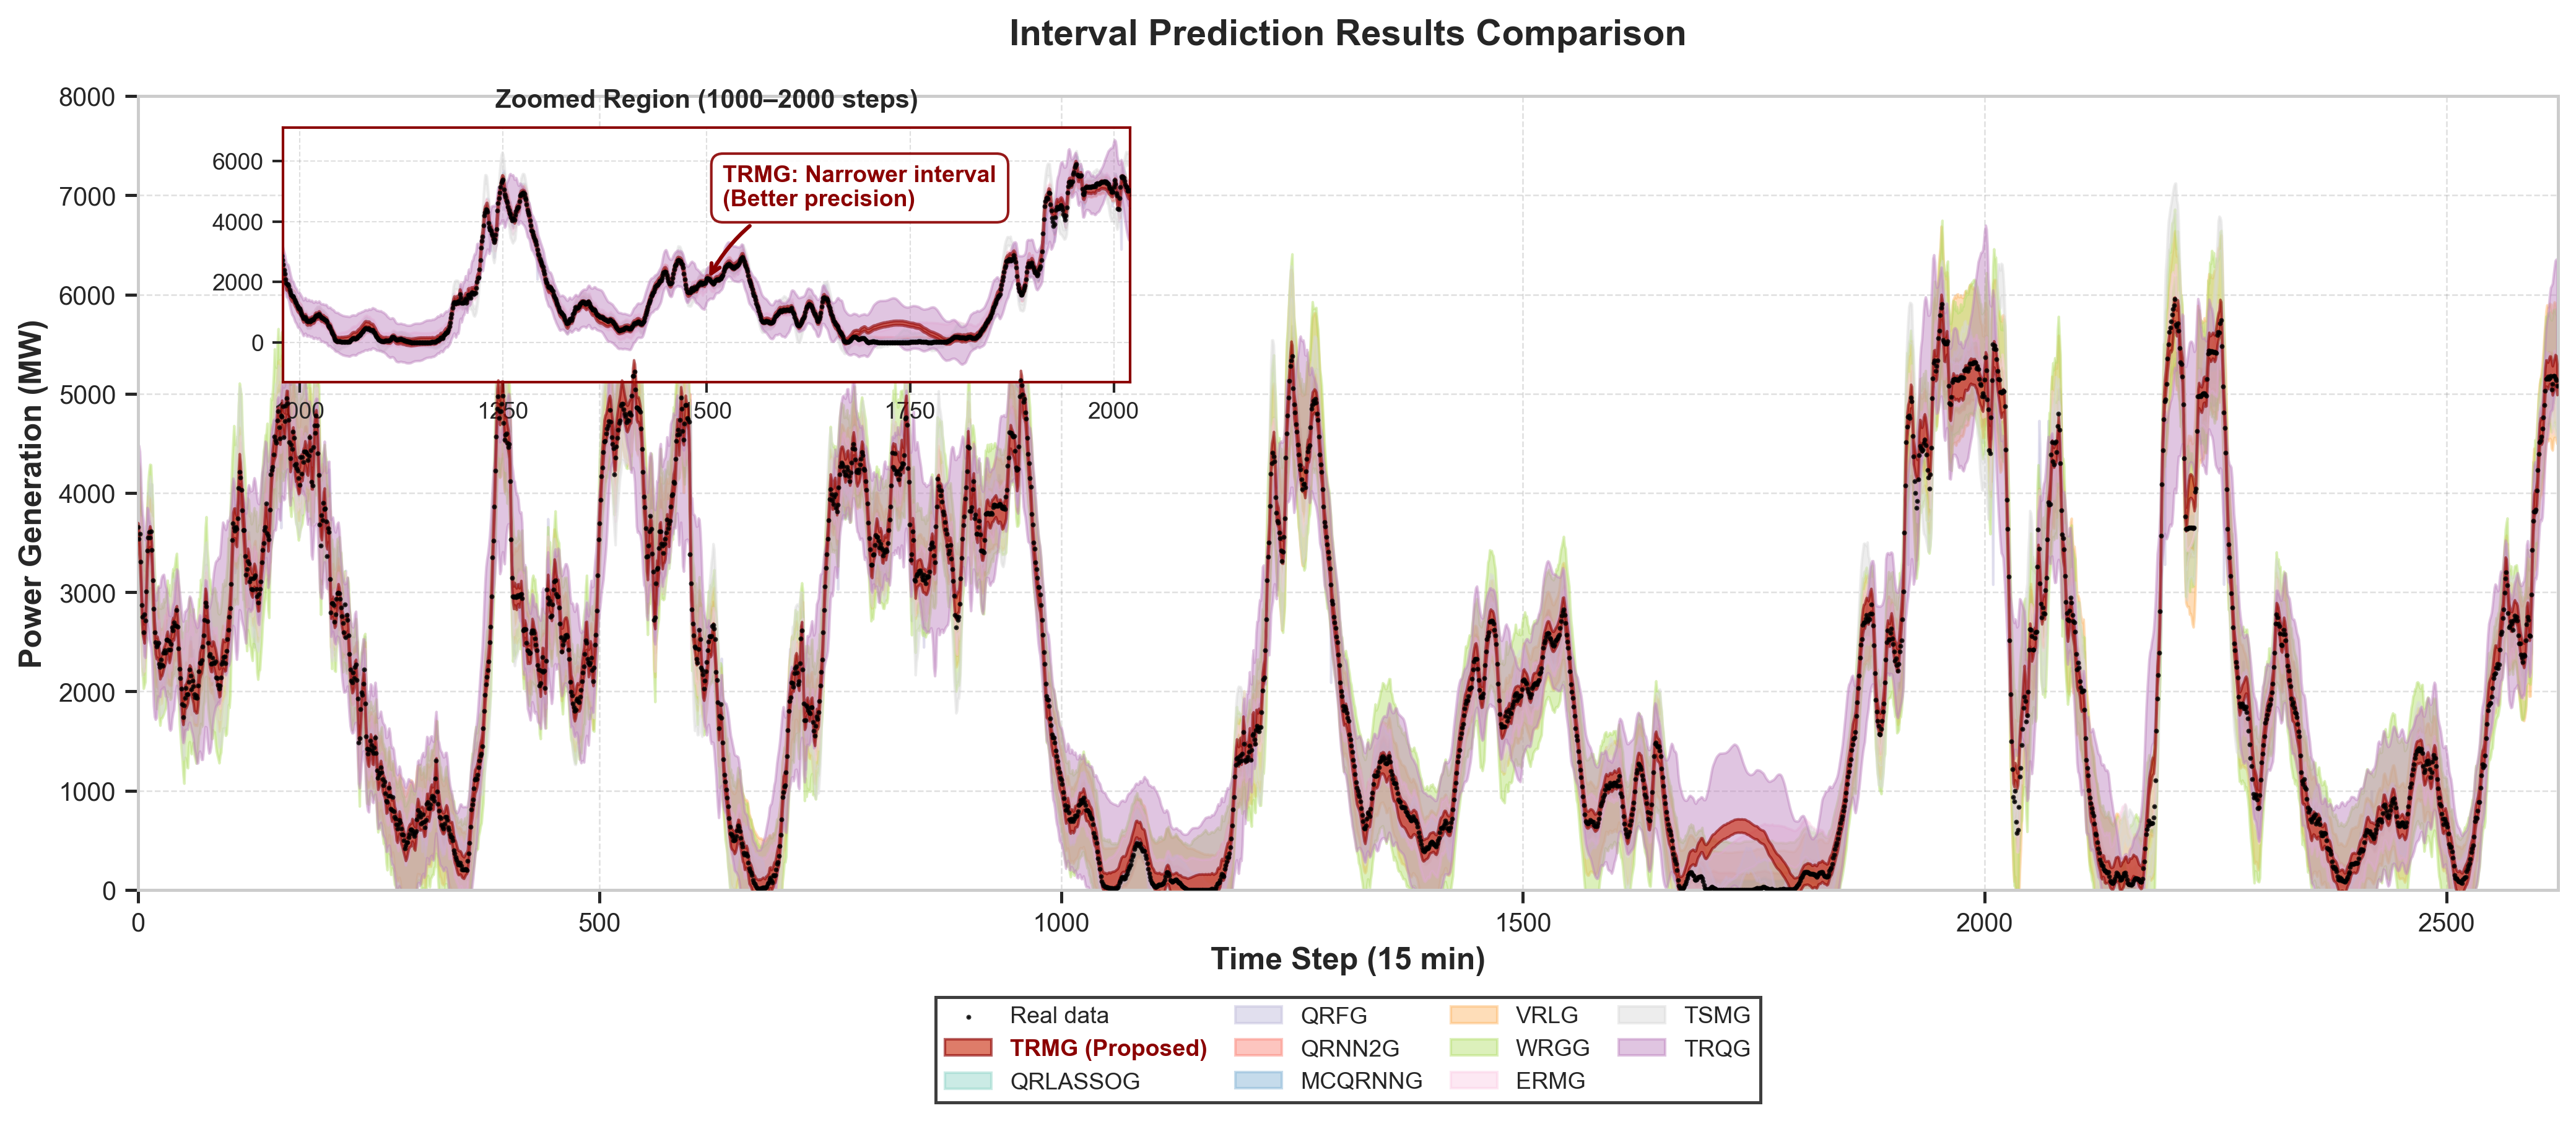

In [3]:
interval_colors = {
    'QRLASSOG': '#8DD3C7',   # 青绿色
    'QRFG': '#BEBADA',       # 淡紫色
    'QRNN2G': '#FB8072',     # 浅红色
    'MCQRNNG': '#80B1D3',    # 浅蓝色
    'VRLG': '#FDB462',       # 橙色
    'WRGG': '#B3DE69',       # 黄绿色
    'ERMG': '#FCCDE5',       # 粉色
    'TSMG': '#D9D9D9',       # 灰色
    'TRQG': '#BC80BD',       # 紫色
}

# TRMG：使用深红色强调
trmg_color = '#C82506'       # 深红色
trmg_edge_color = '#8B0000'  # 深红边框
trmg_alpha = 0.6             # 透明度

# 其他模型的透明度
other_alpha = 0.45

# ==================== 创建主图 ====================
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

# 绘制各模型的预测区间（fill_between）
ax.fill_between(np.arange(n - m), qrlasso[:, 18], qrlasso[:, 0],
                alpha=other_alpha, label='QRLASSOG', color=interval_colors['QRLASSOG'])
ax.fill_between(np.arange(n - m), qrf[:, 18], qrf[:, 0],
                alpha=other_alpha, label='QRFG', color=interval_colors['QRFG'])
ax.fill_between(np.arange(n - m), qrnn[:, 18], qrnn[:, 0],
                alpha=other_alpha, label='QRNN2G', color=interval_colors['QRNN2G'])
ax.fill_between(np.arange(n - m), mcqrnn[:, 18], mcqrnn[:, 0],
                alpha=other_alpha, label='MCQRNNG', color=interval_colors['MCQRNNG'])
ax.fill_between(np.arange(n - m), vrlg[:, 18], vrlg[:, 0],
                alpha=other_alpha, label='VRLG', color=interval_colors['VRLG'])
ax.fill_between(np.arange(n - m), wrgg[:, 18], wrgg[:, 0],
                alpha=other_alpha, label='WRGG', color=interval_colors['WRGG'])
ax.fill_between(np.arange(n - m), ermg[:, 18], ermg[:, 0],
                alpha=other_alpha, label='ERMG', color=interval_colors['ERMG'])
ax.fill_between(np.arange(n - m), tsmg[:, 18], tsmg[:, 0],
                alpha=other_alpha, label='TSMG', color=interval_colors['TSMG'])
ax.fill_between(np.arange(n - m), trqg[:, 18], trqg[:, 0],
                alpha=other_alpha, label='TRQG', color=interval_colors['TRQG'])

# TRMG预测区间（最后绘制，使用深色强调）
ax.fill_between(np.arange(n - m), trmg[:, 18], trmg[:, 0],
                alpha=trmg_alpha, label='TRMG (Proposed)', color=trmg_color,
                edgecolor=trmg_edge_color, linewidth=1.0, zorder=10)

# 真实数据点（黑色散点，最上层）
ax.scatter(x, true_values, color='k', s=0.8, label='Real data', zorder=20, alpha=0.8)

# ==================== 设置坐标轴 ====================
ax.set_ylim(0, 8000)
ax.set_xlim(0, 2621)

# 标题和标签
ax.set_title('Interval Prediction Results Comparison',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Time Step (15 min)', fontsize=12, fontweight='semibold')
ax.set_ylabel('Power Generation (MW)', fontsize=12, fontweight='semibold')

# 刻度设置
ax.tick_params(direction='out', length=5, width=1.2, which='major')

# 网格线
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.6, color='gray')
ax.set_axisbelow(True)

# ==================== 优化图例布局 ====================
# 将TRMG和Real data放在图例前面
handles, labels = ax.get_legend_handles_labels()

# 找到TRMG和Real data的索引
trmg_idx = labels.index('TRMG (Proposed)')
real_idx = labels.index('Real data')

# 提取这两个元素
trmg_handle = handles.pop(trmg_idx)
trmg_label = labels.pop(trmg_idx)

# 调整real_idx（因为已经pop了一个元素）
if real_idx > trmg_idx:
    real_idx -= 1

real_handle = handles.pop(real_idx)
real_label = labels.pop(real_idx)

# 将Real data和TRMG放在最前面
handles.insert(0, real_handle)
labels.insert(0, real_label)
handles.insert(1, trmg_handle)
labels.insert(1, trmg_label)

# 创建图例（4列布局）
legend = ax.legend(handles, labels,
                   loc='upper center',
                   bbox_to_anchor=(0.5, -0.12),
                   ncol=4,
                   frameon=True,
                   fancybox=False,
                   shadow=False,
                   edgecolor='#333333',
                   framealpha=0.95,
                   columnspacing=1.2,
                   handlelength=2.0)

# 设置图例边框
legend.get_frame().set_linewidth(1.2)

# TRMG图例文字加粗和变色
for text in legend.get_texts():
    if 'TRMG' in text.get_text():
        text.set_fontweight('bold')
        text.set_color(trmg_edge_color)

# ==================== 创建局部放大图 ====================
# 放置在左上角空白区域
axins = ax.inset_axes([0.06, 0.64, 0.35, 0.32])

# 在放大图中绘制预测区间
axins.fill_between(np.arange(n - m), qrlasso[m:n, 18], qrlasso[m:n, 0],
                   alpha=other_alpha, color=interval_colors['QRLASSOG'])
axins.fill_between(np.arange(n - m), qrf[m:n, 18], qrf[m:n, 0],
                   alpha=other_alpha, color=interval_colors['QRFG'])
axins.fill_between(np.arange(n - m), qrnn[m:n, 18], qrnn[m:n, 0],
                   alpha=other_alpha, color=interval_colors['QRNN2G'])
axins.fill_between(np.arange(n - m), mcqrnn[m:n, 18], mcqrnn[m:n, 0],
                   alpha=other_alpha, color=interval_colors['MCQRNNG'])
axins.fill_between(np.arange(n - m), ermg[m:n, 18], ermg[m:n, 0],
                   alpha=other_alpha, color=interval_colors['ERMG'])
axins.fill_between(np.arange(n - m), tsmg[m:n, 18], tsmg[m:n, 0],
                   alpha=other_alpha, color=interval_colors['TSMG'])
axins.fill_between(np.arange(n - m), trqg[m:n, 18], trqg[m:n, 0],
                   alpha=other_alpha, color=interval_colors['TRQG'])

# TRMG在放大图中突出显示
axins.fill_between(np.arange(n - m), trmg[m:n, 18], trmg[m:n, 0],
                   alpha=trmg_alpha, color=trmg_color,
                   edgecolor=trmg_edge_color, linewidth=1.2, zorder=10)

# 真实数据点
axins.scatter(x, true_values, s=0.8, color='k', zorder=20, alpha=0.8)

# ==================== 设置放大区域 ====================
zone_left = 1000
zone_right = 2000

x_ratio = 0.02
y_ratio = 0.08

# X轴显示范围
xlim0 = x[zone_left] - (x[zone_right] - x[zone_left]) * x_ratio
xlim1 = x[zone_right] + (x[zone_right] - x[zone_left]) * x_ratio

# Y轴显示范围
y_zone = np.hstack((true_values[zone_left:zone_right],
                    qrlasso[zone_left:zone_right],
                    qrf[zone_left:zone_right],
                    ermg[zone_left:zone_right],
                    tsmg[zone_left:zone_right],
                    trqg[zone_left:zone_right],
                    trmg[zone_left:zone_right]))
ylim0 = np.min(y_zone) - (np.max(y_zone) - np.min(y_zone)) * y_ratio
ylim1 = np.max(y_zone) + (np.max(y_zone) - np.min(y_zone)) * y_ratio

# 调整子坐标系的显示范围
axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)

# ==================== 美化放大图 ====================
# 边框样式（使用TRMG颜色）
for spine in axins.spines.values():
    spine.set_edgecolor(trmg_edge_color)
    spine.set_linewidth(1.0)

# 网格和刻度
axins.grid(True, alpha=0.25, linestyle='--', linewidth=0.5, color='gray')
axins.tick_params(direction='out', length=4, width=1.0, labelsize=9)
axins.set_axisbelow(True)

# 刻度数量
axins.xaxis.set_major_locator(plt.MaxNLocator(5))
axins.yaxis.set_major_locator(plt.MaxNLocator(5))

# 放大图标题
axins.set_title(f'Zoomed Region ({zone_left}–{zone_right} steps)',
                fontsize=10, fontweight='bold', pad=8)

# ==================== 添加注释（突出TRMG优势）====================
# 在放大图中添加箭头指向TRMG区间，说明其更窄
axins.annotate('TRMG: Narrower interval\n(Better precision)',
               xy=(1500, 2000),  # 箭头指向的位置
               xytext=(1520, 4520),  # 文字位置
               arrowprops=dict(arrowstyle='->',
                             color=trmg_edge_color,
                             lw=1.5,
                             connectionstyle="arc3,rad=0.3"),
               fontsize=9,
               fontweight='bold',
               color=trmg_edge_color,
               bbox=dict(boxstyle='round,pad=0.5',
                        facecolor='white',
                        edgecolor=trmg_edge_color,
                        alpha=0.9))

# ==================== 调整整体布局 ====================
plt.tight_layout(rect=[0, 0.08, 1, 0.98])


plt.savefig('interval_prediction.png',
            dpi=400,
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none',
            pad_inches=0.1)
plt.show()

In [4]:
import gc
gc.collect()

158